In [1]:
import pandas as pd
import altair as alt
import numpy as np

In [2]:
df = pd.read_csv("Android_Malware.csv",)

/var/folders/rl/dnlq62k50fd_dd8959xr62nh0000gn/T/ipykernel_7844/4158951998.py:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Android_Malware.csv",)


In [3]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


In [4]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [5]:
df[df.duplicated()]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
258240,203.205.158.60-10.42.0.211-80-48574-6,203.205.158.60,80,10.42.0.211,48574.0,6.0,27/06/2017 02:23:49,4,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
258244,10.42.0.211-111.206.25.159-33521-80-6,111.206.25.159,80,10.42.0.211,33521.0,6.0,27/06/2017 02:23:49,8,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
258588,10.42.0.211-106.39.169.66-38659-443-6,10.42.0.211,38659,106.39.169.66,443.0,6.0,27/06/2017 02:29:27,5,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
258625,10.42.0.211-119.146.74.34-36805-80-6,119.146.74.34,80,10.42.0.211,36805.0,6.0,27/06/2017 02:29:30,10,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
258626,10.42.0.211-119.146.74.48-33523-80-6,119.146.74.48,80,10.42.0.211,33523.0,6.0,27/06/2017 02:29:30,8,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328145,10.42.0.211-118.178.143.65-50070-80-6,10.42.0.211,50070,118.178.143.65,80.0,6.0,30/06/2017 02:48:06,8769698,4,4,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
328146,140.205.61.26-10.42.0.211-80-47648-6,10.42.0.211,47648,140.205.61.26,80.0,6.0,30/06/2017 02:48:17,892843,5,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
328147,140.205.61.26-10.42.0.211-80-47648-6,10.42.0.211,47648,140.205.61.26,80.0,6.0,30/06/2017 02:48:18,109,2,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
328148,10.42.0.211-121.41.62.82-44183-1088-6,10.42.0.211,44183,121.41.62.82,1088.0,6.0,30/06/2017 02:48:17,12192623,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware


In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352745 entries, 0 to 355629
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       352744 non-null  object 
 1    Source IP                    352745 non-null  object 
 2    Source Port                  352745 non-null  int64  
 3    Destination IP               352745 non-null  object 
 4    Destination Port             352745 non-null  float64
 5    Protocol                     352745 non-null  float64
 6    Timestamp                    352745 non-null  object 
 7    Flow Duration                352745 non-null  int64  
 8    Total Fwd Packets            352745 non-null  int64  
 9    Total Backward Packets       352745 non-null  int64  
 10  Total Length of Fwd Packets   352745 non-null  float64
 11   Total Length of Bwd Packets  352745 non-null  float64
 12   Fwd Packet Length Max        352745 non-nul

In [9]:
df.iloc[:,62].unique()

array([0, '0', 'BENIGN', '0.0', nan], dtype=object)

In [10]:
from matplotlib import pyplot as plt

In [20]:
df.iloc[:,9]

0          1
1          1
2         12
3          0
4          6
          ..
355625     1
355626     1
355627     8
355628     1
355629     1
Name:  Total Backward Packets, Length: 352745, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x169e37b20>,
 'caps': [<matplotlib.lines.Line2D at 0x169e570a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x169e37880>],
 'medians': [<matplotlib.lines.Line2D at 0x169e575e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x169e57880>],
 'means': []}

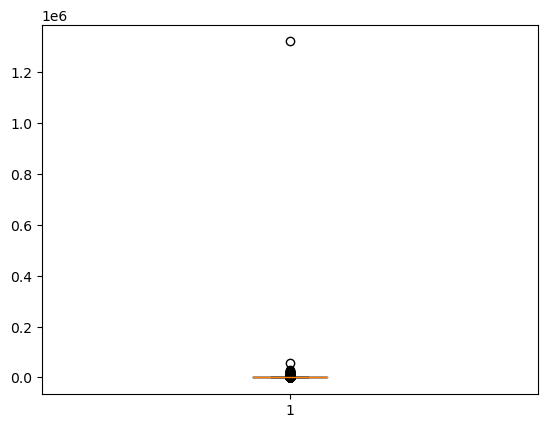

In [11]:
plt.boxplot(df.iloc[:,9])

In [12]:
df.iloc[:,8].idxmax()

262292

In [13]:
df.iloc[262292,:]

Flow ID              174.35.73.149-10.42.0.211-80-50521-6
 Source IP                                    10.42.0.211
 Source Port                                        50521
 Destination IP                             174.35.73.149
 Destination Port                                    80.0
                                     ...                 
Idle Mean                                             0.0
 Idle Std                                             0.0
 Idle Max                                             0.0
 Idle Min                                             0.0
Label                                   Android_Scareware
Name: 262304, Length: 85, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x169f38820>,
 'caps': [<matplotlib.lines.Line2D at 0x169f38d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x169d5dc40>],
 'medians': [<matplotlib.lines.Line2D at 0x169f472e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x169f47580>],
 'means': []}

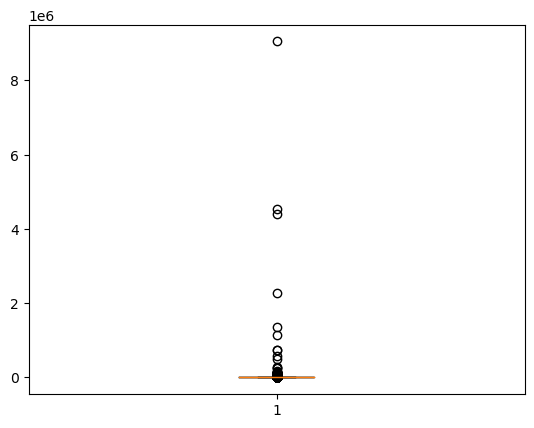

In [14]:
plt.boxplot(df.iloc[:,10])

{'whiskers': [<matplotlib.lines.Line2D at 0x169fa0dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x169faf340>,
 'boxes': [<matplotlib.lines.Line2D at 0x169fa0b20>],
 'medians': [<matplotlib.lines.Line2D at 0x169faf760>],
 'fliers': [<matplotlib.lines.Line2D at 0x169fafa00>],
 'means': []}

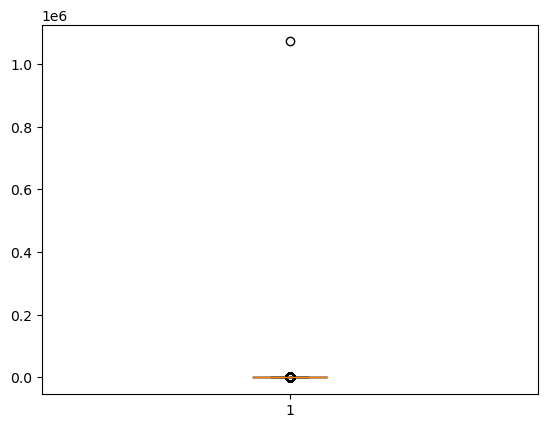

In [15]:
plt.boxplot(df.iloc[:,12])

In [16]:
def count_outliers(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    return len(outliers)

In [17]:
count_outliers(df.iloc[:,12])

27617

In [18]:
for i in range(len(df.columns)):
    try:
        if count_outliers(df.iloc[:,i])>0:
            print(df.columns[i],":",count_outliers(df.iloc[:,i]))
    except:
        continue

 Source Port : 44853
 Destination Port : 45186
 Protocol : 78330
 Flow Duration : 48222
 Total Fwd Packets : 37357
 Total Backward Packets : 40319
Total Length of Fwd Packets : 47050
 Total Length of Bwd Packets : 74730
 Fwd Packet Length Max : 27617
 Fwd Packet Length Min : 10516
 Fwd Packet Length Mean : 43532
 Fwd Packet Length Std : 41442
Bwd Packet Length Max : 69790
 Bwd Packet Length Min : 75644
 Bwd Packet Length Mean : 57790
 Bwd Packet Length Std : 70423
Flow Bytes/s : 56953
 Flow Packets/s : 62361
 Flow IAT Mean : 47625
 Flow IAT Std : 64917
 Flow IAT Max : 47051
 Flow IAT Min : 65336
Fwd IAT Total : 52046
 Fwd IAT Mean : 58997
 Fwd IAT Std : 70052
 Fwd IAT Max : 55330
 Fwd IAT Min : 76128
Bwd IAT Total : 65948
 Bwd IAT Mean : 70531
 Bwd IAT Std : 70783
 Bwd IAT Max : 64914
 Bwd IAT Min : 65283
Fwd PSH Flags : 23034
 Bwd PSH Flags : 1
 Fwd URG Flags : 1
 Bwd URG Flags : 2
 Fwd Header Length : 49914
 Bwd Header Length : 45396
Fwd Packets/s : 63032


In [23]:
df[' Bwd PSH Flags'].unique()

array([  0. , 192.5])

In [ ]:
df.iloc[:,38].unique()

array([  0, 876])

In [ ]:
df.iloc[:,39].unique()

array([  0, 112,   8])